# **Task-2**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
from logger import SetupLogger
from event_analysis import EventChangeAnalyzer


logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

# Set default figure size for all plots
plt.rcParams['figure.figsize'] = (14, 7)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Load the Data

In [2]:
price_data = pd.read_csv('../data/data.csv')
price_data['Date'] = pd.to_datetime(price_data['Date'], format='mixed')
price_data.set_index('Date', inplace=True)

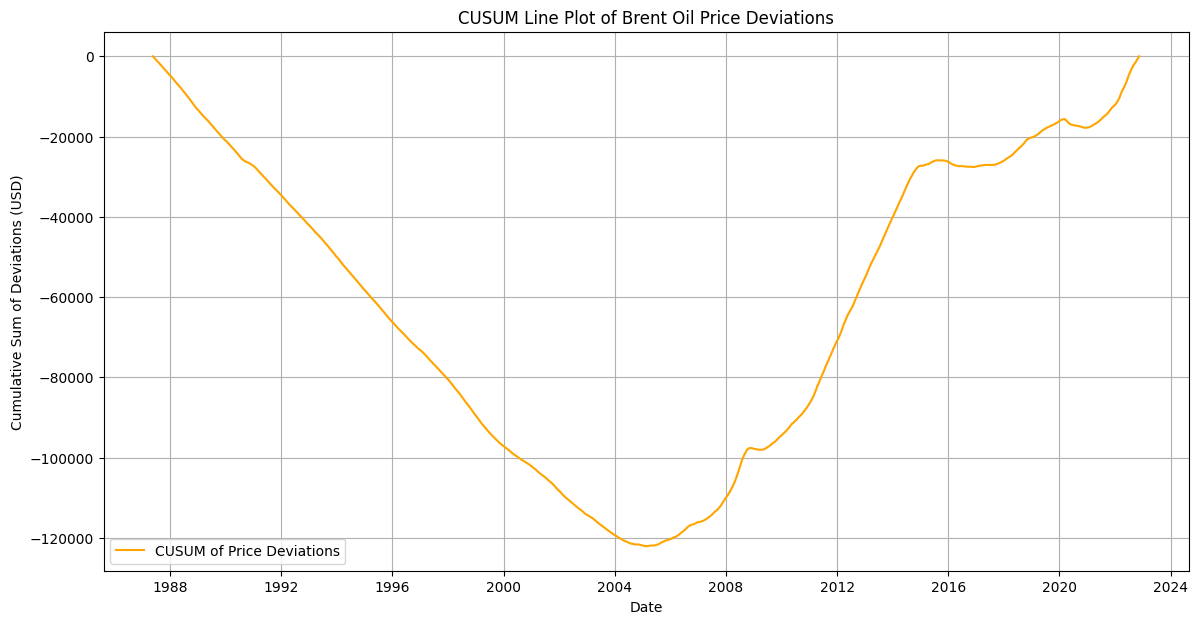

In [3]:
# Usage example
analyzer = EventChangeAnalyzer(price_data, logger=logger)
# Calculate CUSUM
analyzer.calculate_cusum()

# Event Impact Analysis
- Change Point Analysis
- Estimate Change Point
- Analyze the impact of Events on oil price

# Change Point Analysis

Detected change point years: [1999, 2004, 2010, 2014, 2021]


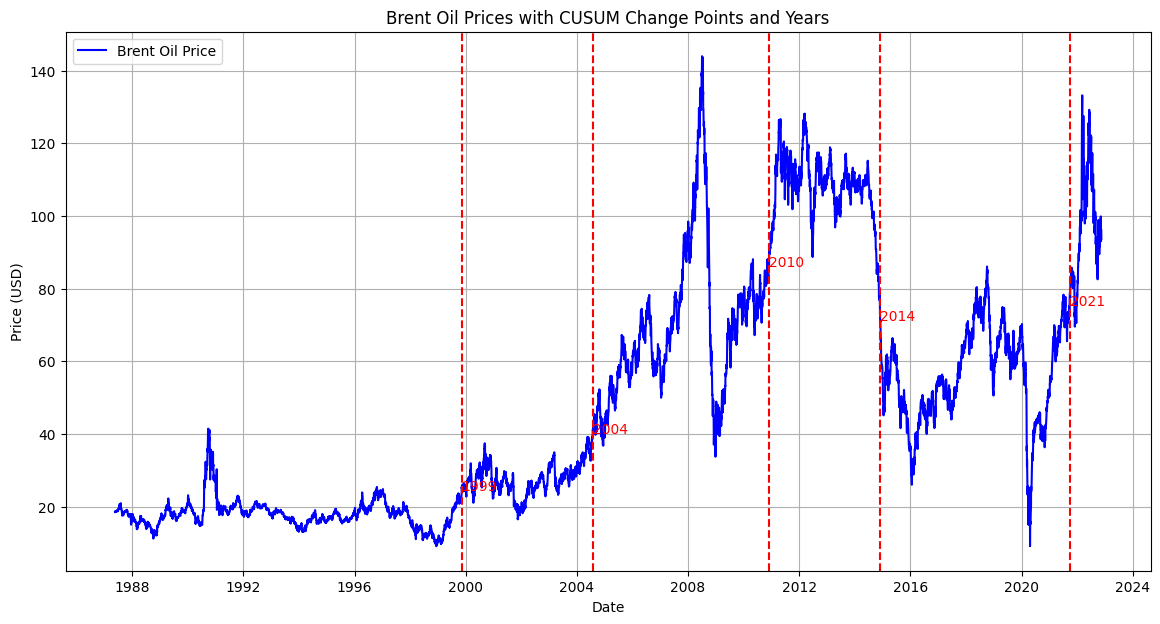

In [4]:
analyzer.detect_change_point()

# Estimate the change point 

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [change_point]
>NUTS: [mu1, mu2, sigma1, sigma2]


/home/neba/Desktop/Data_Engineering/KAMI/Week-10/Brent-Time-Shift/.env/lib/python3.12/site-packages/rich/live.py:23
1: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 13 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


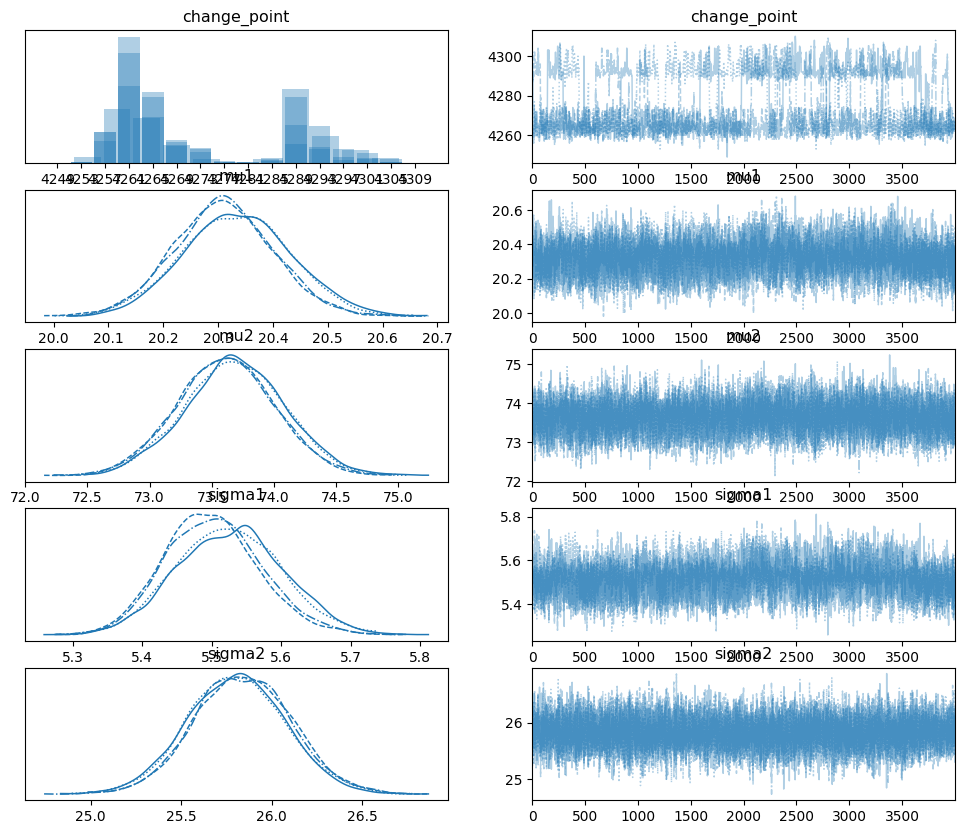

Estimated Change Point Date: 2004-03-04 00:00:00


In [5]:
change_point_date = analyzer.bayesian_change_point_detection()

**Based on the previous analysis on detecting the change points the following key events are identified that were impacted oil prices:**

- **1999 Russian Financial Crisis**: The Russian default on its debt and devaluation of the ruble in 1998 led to a sharp drop in oil prices, but by 1999, the recovery began as oil demand increased, particularly from Asia.

- **2005 Hurricane Katrina**: This devastating hurricane struck the Gulf Coast of the United States in August 2005, causing significant disruptions to oil production and refining capacity, leading to a spike in oil prices.

- **2010 Arab Spring**: The wave of protests and uprisings across the Arab world began in late 2010, leading to political instability in key oil-producing countries such as Libya and Egypt, which drove up Brent oil prices.

- **2014 Oil Price Crash**: In mid-2014, Brent oil prices began to decline sharply due to oversupply in the market, driven by increased production from the U.S. shale oil boom and OPEC's decision not to cut output.

- **2021 COVID-19 Pandemic Recovery**: As global economies began to reopen following lockdowns, demand for oil surged, contributing to significant price increases in 2021. Additionally, OPEC+ production cuts played a role in driving prices higher.

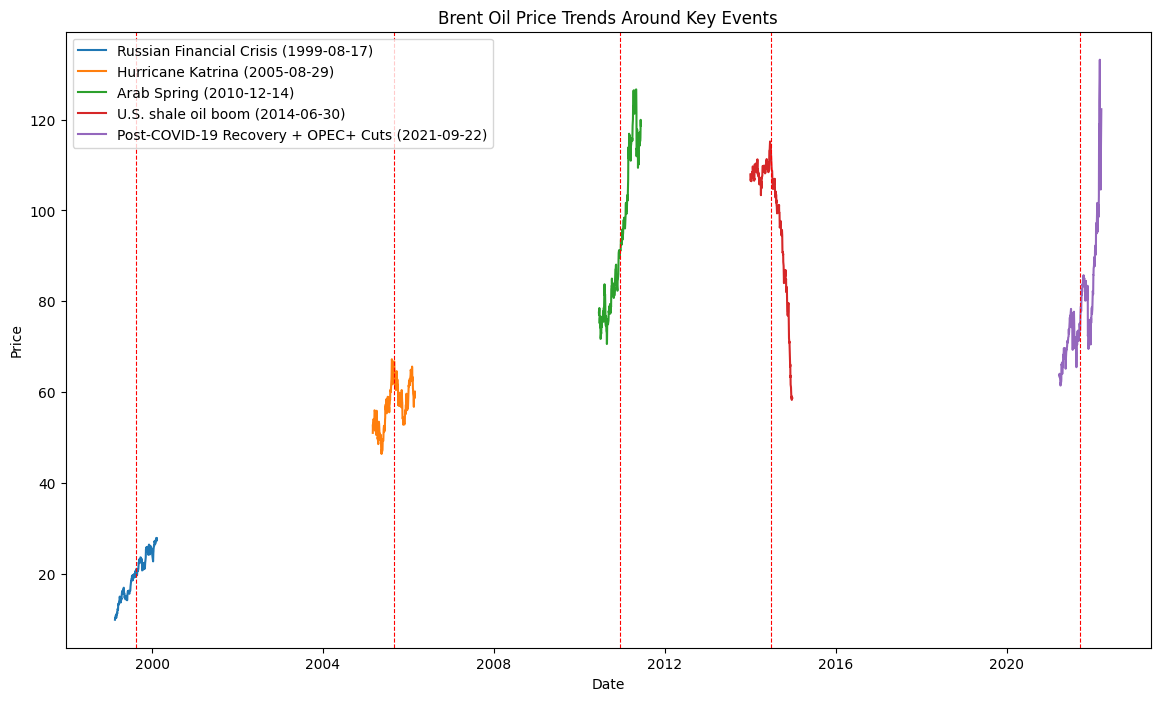

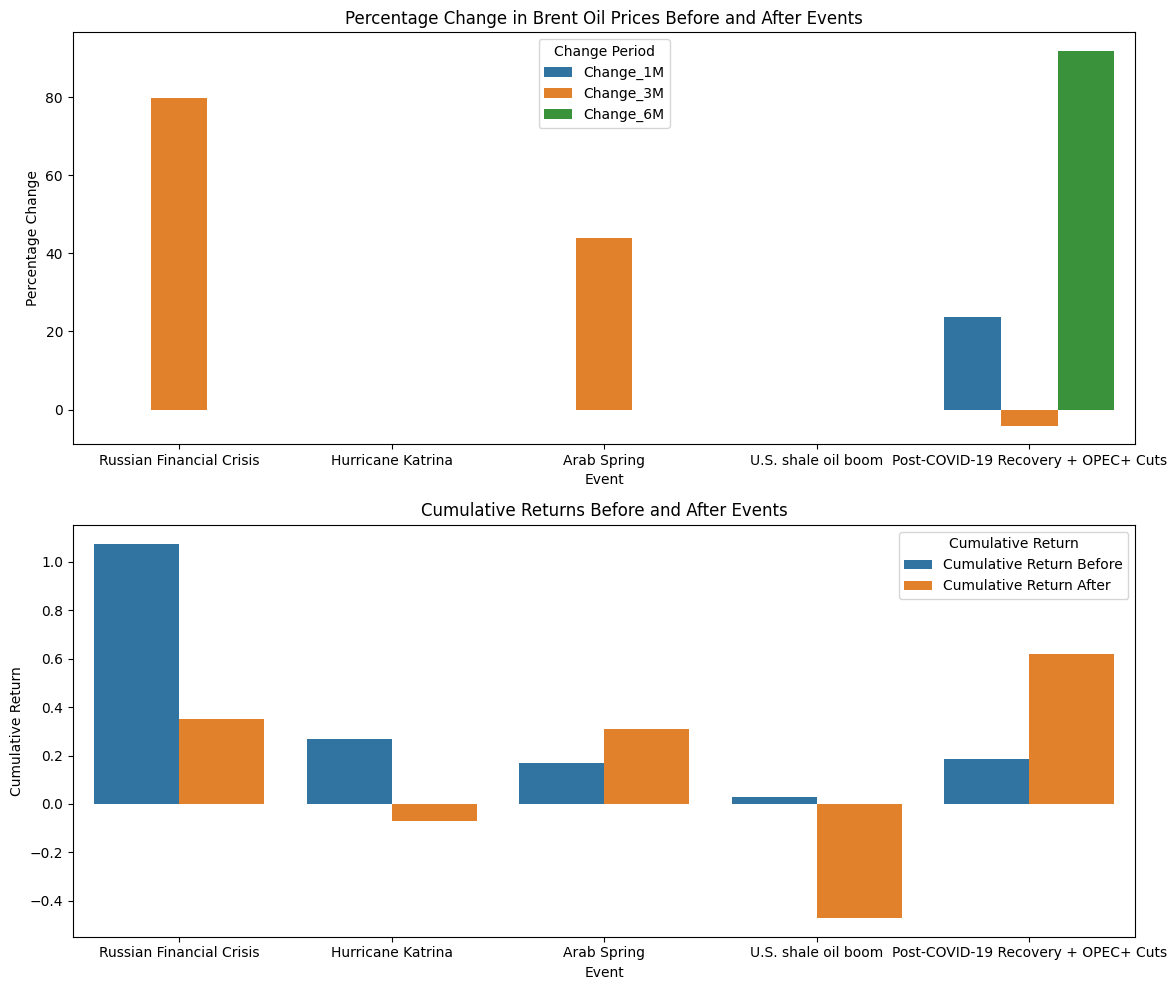

                                     t-statistic       p-value
Russian Financial Crisis              -25.682906  1.910203e-71
Hurricane Katrina                      -8.628759  6.872953e-16
Arab Spring                           -27.332285  1.677389e-76
U.S. shale oil boom                    14.154307  8.427530e-34
Post-COVID-19 Recovery + OPEC+ Cuts   -13.621948  5.968134e-32
Event Impact DataFrame:


,Event,Date,Change_1M,Change_3M,Change_6M,Cumulative Return Before,Cumulative Return After
0,Russian Financial Crisis,1999-08-17,NaN,79.819695,NaN,1.075529,0.349830
1,Hurricane Katrina,2005-08-29,NaN,NaN,NaN,0.268756,-0.071638
2,Arab Spring,2010-12-14,NaN,43.958705,NaN,0.169118,0.309831
3,U.S. shale oil boom,2014-06-30,NaN,NaN,NaN,0.028627,-0.471134
4,Post-COVID-19 Recovery + OPEC+ Cuts,2021-09-22,23.686116,-4.081633,91.767289,0.183942,0.619735



T-Test Results:


,t-statistic,p-value
Russian Financial Crisis,-25.682906,1.910203e-71
Hurricane Katrina,-8.628759,6.872953e-16
Arab Spring,-27.332285,1.677389e-76
U.S. shale oil boom,14.154307,8.427530e-34
Post-COVID-19 Recovery + OPEC+ Cuts,-13.621948,5.968134e-32


In [ ]:
# The researched key events associated with change points
key_events = {
    "Russian Financial Crisis": "1999-08-17",
    "Hurricane Katrina": "2005-08-29",
    "Arab Spring": "2010-12-14",
    "U.S. shale oil boom": "2014-06-30",
    "Post-COVID-19 Recovery + OPEC+ Cuts": "2021-09-22",
}
# Call the analyze_price_changes_around_events method
event_impact_df, t_test_df = analyzer.analyze_price_changes_around_events(key_events)

# Display results
print("Event Impact DataFrame:")
display(event_impact_df)

print("\nT-Test Results:")
display(t_test_df)